In [1]:
import torch
import cv2
from model_autoencoder import Autoencoder
from config import SAVED_MODEL
import matplotlib.pyplot as plt

model = Autoencoder()
model.load_state_dict(torch.load("/fhome/mapsiv01/PSIV3_malaltia/autoencoder/models/model5_AUTOENCODER.pth", map_location=torch.device('cpu')))

<All keys matched successfully>

In [2]:
img = cv2.imread("/fhome/mapsiv/QuironHelico/AnnotatedPatches/B22-138_0/01365.png")
#cv2.imshow("patata", img)

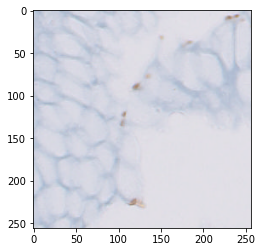

In [3]:
# call imshow() using plt object 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img) 
  
# display that image 
plt.show() 

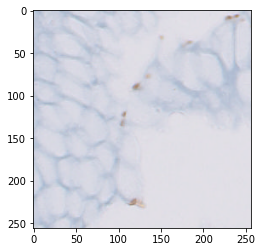

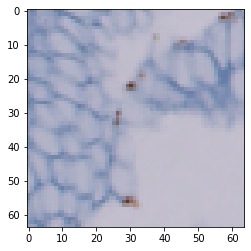

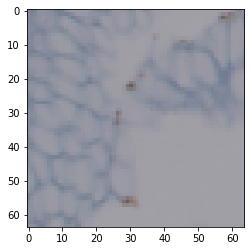

In [4]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

from torchvision import transforms
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((64, 64), antialias=True),
    transforms.Normalize(mean=[0.5], std=[0.5])
])


denormalize = transforms.Normalize(mean=[-0.5], std=[1/0.5])


img2 = train_transform(img)
img3 = denormalize(img2)
plt.imshow(img) 
plt.show() 
plt.imshow(img2.permute(1, 2, 0).detach().numpy()) 
plt.show() 
plt.imshow(img3.permute(1, 2, 0).detach().numpy()) 
plt.show() 


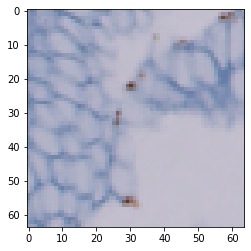

In [5]:
from torchvision import transforms
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((64, 64), antialias=True),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

img2 = train_transform(img)
plt.imshow(img2.permute(1, 2, 0).detach().numpy()) 
plt.show() 
img2 = img2.reshape(1,3,64,64)
img3 = model(img2, "autoencoder")

[]

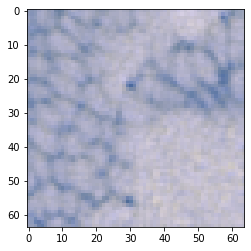

In [6]:
plt.imshow(img3[0,:,:,:].permute(1, 2, 0).detach().numpy())
plt.plot()

In [7]:
from substraction2 import red_pixels

#img2 = img2[0,:,:,:].permute(1, 2, 0).detach().numpy()
red_pixels(img3[0,:,:,:])

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [ ]:
red_pixels(img2[0,:,:,:])

64